In [1]:
import numpy as np
import random
import math

In [2]:
class Game:
    old_state = None
    old_action = None
    
    
    def __init__(self,h,w,par1=0,par2=0,par3=0,th=0,tw=0):
        self.e = 0.01
        self.alpha = 0.1
        self.gamma = 0.9
        self.rate = 0.99
        self.rewmove = -0.1
        self.rwd = 10
        self.lr = 0.05
        self.thres = 0.5
        self.h = h
        self.w = w
        self.a = np.zeros((h,w))
        self.a[0]=1
        self.a[-1]=1
        self.a[:,0]=1
        self.a[:,-1]=1
        self.posx=0
        self.posy=0
        self.th = th
        self.tw = tw
        self.par1 = par1
        self.par2 = par2
        self.par3 = par3
        self.reward = np.ones((self.h,self.w,4))*self.rewmove
        self.transition = np.zeros((self.h,self.w,5))
                
        
    def reset(self):
        self.a = np.zeros((self.h,self.w))
        self.a[0]=1
        self.a[-1]=1
        self.a[:,0]=1
        self.a[:,-1]=1
        self.stenka(self.par1,self.par2,self.par3)
        self.posy = random.randint(1, self.par1-1)
        self.posx = random.randint(1, self.h-2)
        self.a[self.posx,self.posy]=5
        self.a[self.th,self.tw]=8
        
    def draw(self):
        print(self.a)
  
    
    def stenka(self,par1,par2,par3):
        self.par1=par1
        self.par2=par2
        self.par3=par3
        if par1<2 or par1>self.w+2:
            print('wrong parametr par1')
            return
        if par2>par3:
            print('wrong parametr par2')
            return
        if par3>self.h:
            print('wrong parametr par3')
            return
        self.a[:,par1]=1
        for i in range(par3-par2):
            self.a[par2+i,par1]=0
            
        for i in range(self.h):
            for j in range(self.w):
                if self.a[i,j]!=1:
                    if self.a[i-1,j]!=1:
                        self.transition[i,j,0]=1
                    if self.a[i+1,j]!=1:
                        self.transition[i,j,1]=1
                    if self.a[i,j-1]!=1:
                        self.transition[i,j,2]=1
                    if self.a[i,j+1]!=1:
                        self.transition[i,j,3]=1     
    
    
    def update(self,xold,yold,xnew,ynew):
        if xnew == self.th and ynew == self.tw:
            print('GAME WIN')
          #  self.__init__(self.h,self.w,par1=self.par1,par2=self.par2,par3=self.par3,th=self.th,tw=self.tw)
          #  self.stenka(self.par1,self.par2,self.par3)
          #  self.tcel(self.th,self.tw)
          #  self.draw()   
            return 'win'
        k = self.a[xold,yold]
        self.a[xold,yold] = self.a[xnew,ynew]
        self.a[xnew,ynew] = k
        return 'move'
      
    def play(self):
        k=True
        while k:
            key = ord(getch())
            print(key)
            if key==27:
                k=False
            if key == 80: #Down arrow
                self.down()
            elif key == 72: #Up arrow
                self.up()
            elif key == 75: #Left arrow
                self.left()
            elif key == 77: #Right arrow
                self.right()
            print(self.a)    
    
    def tcel(self,h,w):
        self.th=h
        self.tw=w
        self.a[h,w]=8
        
        trans = self.transition[h,w]
        if trans[0]==1:
            self.reward[self.th-1,self.tw,1]=self.rwd
        if trans[1]==1:
            self.reward[self.th+1,self.tw,0]=self.rwd
        if trans[2]==1:
            self.reward[self.th,self.tw-1,3]=self.rwd
        if trans[3]==1:
            self.reward[self.th,self.tw+1,2]=self.rwd
        
    def up(self):
        xold,yold = self.posx,self.posy
        if self.a[self.posx-1,self.posy] ==1:
            print('udar v stenku!')
            a,tr = 'udar',[self.posx,self.posy]
        else:
            self.posx = self.posx-1
            a,tr = self.update(xold,yold,self.posx,self.posy),[self.posx,self.posy]
        return a,tr
        
    def down(self):
        xold,yold = self.posx,self.posy
        if self.a[self.posx+1,self.posy] ==1:
            print('udar v stenku!')
            a,tr = 'udar',[self.posx,self.posy]
        else:
            self.posx = self.posx+1
            a,tr = self.update(xold,yold,self.posx,self.posy),[self.posx,self.posy]
        return a,tr     
        
    def left(self):
        xold,yold = self.posx,self.posy
        if self.a[self.posx,self.posy-1] ==1:
            print('udar v stenku!')
            a,tr = 'udar',[self.posx,self.posy]
        else:
            self.posy = self.posy-1
            a,tr = self.update(xold,yold,self.posx,self.posy),[self.posx,self.posy]
        return a,tr    
        
    def right(self):
        xold,yold = self.posx,self.posy
        if self.a[self.posx,self.posy+1] ==1:
            print('udar v stenku!')
            a,tr = 'udar',[self.posx,self.posy]
        else:
            self.posy = self.posy+1
            a,tr = self.update(xold,yold,self.posx,self.posy),[self.posx,self.posy]
        return a,tr
    
    def act(self,key,transition):
        randm = random.random()
    #    if randm>0.9:
    #        key = self.get_rnd_next_state(transition)
    #    print(key,' key')    
        if key ==0:
            r,tr = self.up()
        if key ==1:
            r,tr = self.down()
        if key ==2:
            r,tr = self.left()
        if key ==3:
            r,tr = self.right()
        return r,tr
    
    def get_poss_next_states(self,transition,nnext=8):
  # given a state s and a feasibility matrix F
  # get list of possible next states
        if nnext==8:
            tr = transition[self.posx,self.posy]
            actions = [index for index,value in enumerate(tr) if value==1]
        if nnext!=8:
            if nnext==0:
                tr = transition[self.posx-1,self.posy]
                actions = [index for index,value in enumerate(tr) if value==1]
            if nnext==1:
                tr = transition[self.posx+1,self.posy]
                actions = [index for index,value in enumerate(tr) if value==1]
            if nnext==2:
                tr = transition[self.posx,self.posy-1]
                actions = [index for index,value in enumerate(tr) if value==1]
            if nnext==3:
                tr = transition[self.posx,self.posy+1]
                actions = [index for index,value in enumerate(tr) if value==1]
                
        return actions 
    def get_rnd_next_state(self,transition):
  # given a state s, pick a feasible next state
        poss_next_states = self.get_poss_next_states(transition)
        next_state = poss_next_states[np.random.randint(0,len(poss_next_states))]
        return next_state

In [3]:
class agent(Game):
    def __init__(self,h,w):
        Game.__init__(self,h,w,par1=0,par2=0,par3=0,th=0,tw=0)
        self.positivebag = []
        self.negativebag = []
        self.bags = []
        self.trajss = []
        
            
            
    def init2(self):
        self.DD = np.ones((self.h,self.w))
        self.ro = np.zeros((self.h,self.w))
        self.Qt = np.zeros((self.h,self.w,5))
        self.Qt1 = np.zeros((self.h,self.w,4))
        self.setI = []
        self.NeSetIfu = []
        self.B = np.ones((self.h,self.w))*7
        self.transition1 = np.zeros((self.h,self.w,4))
        self.xx,self.yy =0,0
        
        self.staticfilter = [[self.th,self.tw],[self.th-1,self.tw],[self.th+1,self.tw],[self.th,self.tw-1],[self.th,self.tw+1],[self.th+1,self.tw+1],[self.th-1,self.tw-1],[self.th+1,self.tw-1],[self.th-1,self.tw+1]]
        for i in range(self.h):
            self.staticfilter.append([i,0])
            self.staticfilter.append([i,1])
            self.staticfilter.append([i,self.w-1])
          #  self.staticfilter.append([i,self.w-2])
        for i in range(self.w):
            self.staticfilter.append([0,i])
            self.staticfilter.append([self.h-1,i])
            self.staticfilter.append([1,i])
         #   self.staticfilter.append([self.h-2,i])
            
    def DDf(self):
        self.DD = np.ones((self.h,self.w))
        for i in range(self.h):
            for j in range(self.w):
                for n in range(len(self.positivebag)):
                    if [i,j] in self.positivebag[n]:
                        sump = 1
                        for p in range(len(self.positivebag[n])):
                            sumbc=0
                            for k in range(2):
                                sumbc += pow((self.positivebag[n][p][k]-self.th),2)    
                            sump *= 1-math.exp(-sumbc)  
                        self.DD[i,j] *= (1- sump)

        for i in range(self.h):
            for j in range(self.w):
                for n in range(len(self.negativebag)):
                    if [i,j] in self.negativebag[n]:
                        sump = 1
                        for p in range(len(self.negativebag[n])):
                            sumbc=0
                            for k in range(2):
                                sumbc += pow((self.negativebag[n][p][k]-self.tw),2)    
                            sump *= 1-math.exp(-sumbc)  
                        self.DD[i,j] *= (sump)
        return self.DD    

In [4]:
#env = game
ag = agent(10,10)
ag.stenka(5,4,6)
ag.tcel(8,8)
ag.init2()
ag.reset()
ag.draw()

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 5. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 0. 8. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [4]:
from tkinter import *
from tkinter import ttk
import time

def draw():
    global canvas
    for i in range(ag.a.shape[0]):
        for j in range(ag.a.shape[1]):

            if ag.a[i][j] != 1:
                color = "white"
            else:
                color = "black"
            id_num = i * len(ag.a[0]) + j + 1
         #   print(id_num)
            canvas.itemconfig(id_num,fill=color)
    state = ag.posx*ag.w+ag.posy    
    canvas.itemconfig(state+1,fill="blue")
    goal = ag.th*ag.w+ag.tw 
    canvas.itemconfig(goal+1,fill="yellow")  
    subgoal = ag.xx*ag.w+ag.yy 
    canvas.itemconfig(subgoal+1,fill="red")
    root.update()
  #  time.sleep(0.1)

In [5]:
pixel_width = 480
block_length = pixel_width / ag.w
root = Tk()
root.title("Grid World")
canvas = Canvas(root,width = "500",height = "500")
canvas.grid(column=0, row=0, sticky=(N, W, E, S))
for i in range(ag.h):
    for j in range(ag.w):
        x_1 = 10 + block_length * j
        y_1 = 10 + block_length * i
        x_2 = x_1 + block_length
        y_2 = y_1 + block_length

        if ag.a[i][j] != 1:
            color = "white"
        else:
            color = "black"

        canvas.create_rectangle(x_1,y_1,x_2,y_2,fill=color)

ag = agent(10,10)
ag.stenka(5,4,6)
ag.tcel(8,8)
ag.init2()
for epochs in range(300):
    ag.reset()
    bag = []
    trajs = []
    ag.transition1 = np.zeros((ag.h,ag.w,4))
    ag.transition[:,:,4] = 0
    
    for i in range(ag.h):
        for j in range(ag.w):
            if ag.B[i,j]==0:
                ag.transition[i,j,4]=1
                if ag.transition[i,j,0]==1 and [i-1,j] in ag.setI:
                    ag.transition1[i,j,0]=1

                if ag.transition[i,j,1]==1 and [i+1,j] in ag.setI:
                    ag.transition1[i,j,1]=1

                if ag.transition[i,j,2]==1 and [i,j-1] in ag.setI:
                    ag.transition1[i,j,2]=1

                if ag.transition[i,j,3]==1 and [i,j+1] in ag.setI:
                    ag.transition1[i,j,3]=1
                    
    ag.transition[ag.xx,ag.yy,4]=0
    ag.transition1[ag.xx,ag.yy] = ag.transition[ag.xx,ag.yy,:4]                
    num_opt = 0    
    
    for i in range(50):
        actions = ag.get_poss_next_states(ag.transition)
        startOption = False
        vall = [value for index,value in enumerate(ag.Qt[ag.posx,ag.posy]) if index in actions]
        print(ag.posx,ag.posy, 'position',actions,vall)
        maxval = max(vall)
        maxindval = [index for index,value in enumerate(ag.Qt[ag.posx,ag.posy]) if (index in actions and value==maxval)]
        next_s = random.choice(maxindval)
        
        if next_s==0:
            next_x,next_y = ag.posx-1,ag.posy
        if next_s==1:
            next_x,next_y = ag.posx+1,ag.posy
        if next_s==2:
            next_x,next_y = ag.posx,ag.posy-1
        if next_s==3:
            next_x,next_y = ag.posx,ag.posy+1
        if next_s==4:
            Rr = 0
            iii = 0
            mmax_Q = -9999
            oldX = ag.posx
            oldY = ag.posy
            while [ag.posx,ag.posy] in ag.setI and [ag.posx,ag.posy]!=[ag.xx,ag.yy] and iii<10:
                num_opt+=1

                startOption = True
                actions = ag.get_poss_next_states(ag.transition1)

                vall = [value for index,value in enumerate(ag.Qt1[ag.posx,ag.posy]) if index in actions]
                maxval = max(vall)
                maxindval = [index for index,value in enumerate(ag.Qt1[ag.posx,ag.posy]) if (index in actions and value==maxval)]
                next_s = random.choice(maxindval)
                print(ag.posx,ag.posy, 'POSITION',next_s,actions,vall)
                if next_s==0:
                    next_x,next_y = ag.posx-1,ag.posy
                if next_s==1:
                    next_x,next_y = ag.posx+1,ag.posy
                if next_s==2:
                    next_x,next_y = ag.posx,ag.posy-1
                if next_s==3:
                    next_x,next_y = ag.posx,ag.posy+1
                poss_next_next_states = ag.get_poss_next_states(ag.transition1,nnext=next_s)
                max_Q = -9999
                
                for j in range(len(poss_next_next_states)):
                    nn_s = poss_next_next_states[j]
                    q = ag.Qt1[next_x,next_y,nn_s]
                    if q > max_Q:
                        max_Q = q   
                        
                R = ag.reward[ag.posx,ag.posy,next_s]
                if next_s==0 and iii>0:
                    if [(ag.posx-1),(ag.posy)]==[ag.xx,ag.yy]:
                        R+=1
                if next_s==1 and iii>0:
                    if [(ag.posx+1),ag.posy]==[ag.xx,ag.yy]:
                        R+=1
                if next_s==2 and iii>0:
                    if [ag.posx,(ag.posy-1)]==[ag.xx,ag.yy]:
                        R+=1
                if next_s==3 and iii>0:
                    if [ag.posx,(ag.posy+1)]==[ag.xx,ag.yy]:
                        R+=1
                if R>5:
                    print('ADD REWARD ',ag.posx,ag.posy,next_s)
                Rr+=R*pow(0.9,iii)
                if max_Q>mmax_Q:
                    mmax_Q = max_Q
                ag.Qt1[ag.posx,ag.posy][next_s] = ((1 - ag.lr) * ag.Qt1[ag.posx,ag.posy][next_s]) + (ag.lr * (R +(ag.gamma * max_Q)))
                randm = random.random()
                if randm>0.9:
                    next_s = ag.get_rnd_next_state(ag.transition1)
                r,tr = ag.act(next_s,ag.transition1)
                draw()
                trajs.append(next_s)
                bag.append(tr)
                iii+=1
            R = Rr
            max_Q = mmax_Q
            ag.Qt[oldX,oldY][4] = ((1 - ag.lr) * ag.Qt[oldX,oldY][4]) + (ag.lr * (R +(ag.gamma * max_Q)))
            ag.transition[:,:,4] = 0  
            #
            #
            
        if startOption==False:    
                poss_next_next_states = ag.get_poss_next_states(ag.transition,nnext=next_s)    

                max_Q = -9999
                for j in range(len(poss_next_next_states)):
                    nn_s = poss_next_next_states[j]
                    q = ag.Qt[next_x,next_y,nn_s]
                    if q > max_Q:
                        max_Q = q
                R = ag.reward[ag.posx,ag.posy,next_s]
                ag.Qt[ag.posx,ag.posy][next_s] = ((1 - ag.lr) * ag.Qt[ag.posx,ag.posy][next_s]) + (ag.lr * (R +(ag.gamma * max_Q)))


                randm = random.random()
                if randm>0.9:
                    next_s = random.randint(0,3)
                r,tr = ag.act(next_s,ag.transition)
                draw()
                trajs.append(next_s)
                bag.append(tr)
        if r=='win':
            ag.positivebag.append(bag)
            break        
    if r!='win':
        ag.negativebag.append(bag)
    ag.bags.append(bag)
    ag.trajss.append(trajs)

    ag.DD = ag.DDf()
    ag.DD = np.log(ag.DD)*(-1)  
 #   print(ag.DD)
    ind = np.where(ag.DD==ag.DD.max())
    x_y_coords =  zip(ind[0], ind[1])
 #   print('!!!!!!!!!!!!!!',ind,ag.DD.max())
    ag.setI = []
    ag.NeSetI = []
    ag.B = np.ones((ag.h,ag.w))*7
    options= 0
    maxro = 0
    dooption = False
    for x,y in x_y_coords:
        if ([x,y] not in ag.staticfilter) and [x,y] in [item for sublist in ag.bags for item in sublist]:
            ag.ro[x,y]+=1
            ag.B = np.ones((ag.h,ag.w))*7
            
            if (ag.ro[x,y]>=3 and ag.ro[x,y]>=maxro):
                maxro = ag.ro[x,y]
                ag.xx = x
                ag.yy = y
                dooption = True
                
                
      #  x,y = x_y_coords[-1]
 #and [ag.xx,ag.yy] in [item for sublist in ag.bags for item in sublist]:
                options +=1

            
                ag.setI = []
        #           replay = []

                for bbag,ttraj in zip(ag.bags[-20:],ag.trajss[-20:]):

                    if [ag.xx,ag.yy] in bbag[2:]:
                        NeSetIfu = []
                        for i2,i3 in enumerate(zip(bbag,ttraj)):
                            inst = i3[0]
                            insttr = i3[1]
                            NeSetIfu.append(inst)
                            if inst not in ag.setI:
                                ag.setI.append(inst)
                            if [ag.xx,ag.yy] == inst:
                                break    
                        ag.NeSetI.append(NeSetIfu)

    if dooption:    
        for ib in range(ag.h):
            for jb in range(ag.w):
                if [ib,jb] not in ag.setI:
                    ag.B[ib,jb] = 1
                else:
                    ag.B[ib,jb] = 0
        ag.B[ag.xx,ag.yy] = 0            
        print(ag.B)
        print(ag.xx,ag.yy,' XX YY')
        ag.Qt[:,:,4]*=(1-ag.B)
    ag.ro =ag.ro*0.8
    
  #  break     
root.destroy()

NameError: name 'ag' is not defined

In [58]:
root.destroy()

TclError: can't invoke "destroy" command: application has been destroyed

In [47]:
ag.reset()
r='loose'
while r!='win':
    startOption=False
    actions = ag.get_poss_next_states(ag.transition)
    vall = [value for index,value in enumerate(ag.Qt[ag.posx,ag.posy]) if index in actions]
    print(ag.posx,ag.posy, 'position',actions,vall)
    maxval = max(vall)
    maxindval = [index for index,value in enumerate(ag.Qt[ag.posx,ag.posy]) if (index in actions and value==maxval)]
    next_s = random.choice(maxindval)
    print(next_s)
    if next_s==0:
        next_x,next_y = ag.posx-1,ag.posy
    if next_s==1:
        next_x,next_y = ag.posx+1,ag.posy
    if next_s==2:
        next_x,next_y = ag.posx,ag.posy-1
    if next_s==3:
        next_x,next_y = ag.posx,ag.posy+1
    if next_s==4:
        while [ag.posx,ag.posy] in ag.setI and [ag.posx,ag.posy]!=[ag.xx,ag.yy] and iii<10:
            startOption = True
            actions = ag.get_poss_next_states(ag.transition1)

            vall = [value for index,value in enumerate(ag.Qt1[ag.posx,ag.posy]) if index in actions]
            maxval = max(vall)
            maxindval = [index for index,value in enumerate(ag.Qt1[ag.posx,ag.posy]) if (index in actions and value==maxval)]
            next_s = random.choice(maxindval)
            r,tr = ag.act(next_s,ag.transition1)
            draw()
    if startOption==False:    
                if randm>0.9:
                    next_s = random.randint(0,3)
                r,tr = ag.act(next_s,ag.transition)        
    draw()        

6 3 position [0, 1, 2, 3] [-0.21628769509277296, -0.21517269461315536, -0.21305221020644544, -0.213700733529099]
2
6 2 position [0, 1, 2, 3] [-0.2121478243896758, -0.2130756003462837, -0.21264485083065773, -0.10036322441101356]
3
6 3 position [0, 1, 2, 3] [-0.21628769509277296, -0.21517269461315536, -0.21305221020644544, -0.213700733529099]
2
6 2 position [0, 1, 2, 3] [-0.2121478243896758, -0.2130756003462837, -0.21264485083065773, -0.10036322441101356]
3
6 3 position [0, 1, 2, 3] [-0.21628769509277296, -0.21517269461315536, -0.21305221020644544, -0.213700733529099]
2
6 2 position [0, 1, 2, 3] [-0.2121478243896758, -0.2130756003462837, -0.21264485083065773, -0.10036322441101356]
3
6 3 position [0, 1, 2, 3] [-0.21628769509277296, -0.21517269461315536, -0.21305221020644544, -0.213700733529099]
2
6 2 position [0, 1, 2, 3] [-0.2121478243896758, -0.2130756003462837, -0.21264485083065773, -0.10036322441101356]
3
6 3 position [0, 1, 2, 3] [-0.21628769509277296, -0.21517269461315536, -0.213052

6 3 position [0, 1, 2, 3] [-0.21628769509277296, -0.21517269461315536, -0.21305221020644544, -0.213700733529099]
2
6 2 position [0, 1, 2, 3] [-0.2121478243896758, -0.2130756003462837, -0.21264485083065773, -0.10036322441101356]
3
6 3 position [0, 1, 2, 3] [-0.21628769509277296, -0.21517269461315536, -0.21305221020644544, -0.213700733529099]
2
6 2 position [0, 1, 2, 3] [-0.2121478243896758, -0.2130756003462837, -0.21264485083065773, -0.10036322441101356]
3
6 3 position [0, 1, 2, 3] [-0.21628769509277296, -0.21517269461315536, -0.21305221020644544, -0.213700733529099]
2
6 2 position [0, 1, 2, 3] [-0.2121478243896758, -0.2130756003462837, -0.21264485083065773, -0.10036322441101356]
3
6 3 position [0, 1, 2, 3] [-0.21628769509277296, -0.21517269461315536, -0.21305221020644544, -0.213700733529099]
2
6 2 position [0, 1, 2, 3] [-0.2121478243896758, -0.2130756003462837, -0.21264485083065773, -0.10036322441101356]
3
6 3 position [0, 1, 2, 3] [-0.21628769509277296, -0.21517269461315536, -0.213052

6 2 position [0, 1, 2, 3] [-0.2121478243896758, -0.2130756003462837, -0.21264485083065773, -0.10036322441101356]
3
6 3 position [0, 1, 2, 3] [-0.21628769509277296, -0.21517269461315536, -0.21305221020644544, -0.213700733529099]
2
6 2 position [0, 1, 2, 3] [-0.2121478243896758, -0.2130756003462837, -0.21264485083065773, -0.10036322441101356]
3
6 3 position [0, 1, 2, 3] [-0.21628769509277296, -0.21517269461315536, -0.21305221020644544, -0.213700733529099]
2
6 2 position [0, 1, 2, 3] [-0.2121478243896758, -0.2130756003462837, -0.21264485083065773, -0.10036322441101356]
3
6 3 position [0, 1, 2, 3] [-0.21628769509277296, -0.21517269461315536, -0.21305221020644544, -0.213700733529099]
2
6 2 position [0, 1, 2, 3] [-0.2121478243896758, -0.2130756003462837, -0.21264485083065773, -0.10036322441101356]
3
6 3 position [0, 1, 2, 3] [-0.21628769509277296, -0.21517269461315536, -0.21305221020644544, -0.213700733529099]
2
6 2 position [0, 1, 2, 3] [-0.2121478243896758, -0.2130756003462837, -0.21264485

KeyboardInterrupt: 

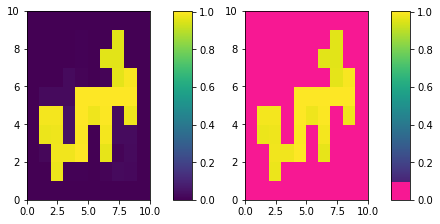

In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from collections import OrderedDict
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)


def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = ag.DD

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=max(ag.DD.flatten()))
        fig.colorbar(psm, ax=ax)
    plt.show()

plot_examples([viridis, newcmp])

In [15]:
n = np.zeros((10,10))
for x,y in ag.staticfilter:
    n[x,y]=1
n    

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [16]:
print(len(ag.positivebag))
print(len(ag.negativebag))

220
80


In [29]:
ag.ro

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.99999986e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.99999986e+00, 0.00000000e+00,
        3.99999986e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.99999986e+00, 3.99999986e+00,
        3.99999986e+00, 3.99999986e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.99999986e+00, 3.99999986e+00,
   

In [17]:
ag.DD

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00],
       [-0.00000000e+00,  9.91135461e-06,  9.77988692e-01,
         7.32761120e-03,  7.32850579e-03, -0.00000000e+00,
         8.37722643e-03,  2.74718306e-02,  2.01588264e-02,
        -0.00000000e+00],
       [-0.00000000e+00,  1.86725030e-02,  9.85306417e-01,
         9.85643728e-01,  1.00546876e+00, -0.00000000e+00,
         9.68091464e-01,  8.38182727e-03,  2.74718306e-02,
        -0.00000000e+00],
       [-0.00000000e+00,  9.77992370e-01,  9.78766236e-01,
         4.62033309e-02,  9.98156180e-01, -0.00000000e+00,
         9.87186583e-01,  2.78671678e-02,  2.78622133e-02,
        -0.00000000e+00],
       [-0.00000000e+00,  9.86474241e-01,  9.86475015e-01,
         4.65905459e-02,  1.00596150e+00,  9.79986707e-01,
         9.98590650e-01,  2.79226403e-02,  9.79917036e-01,
        -0.

In [18]:
np.log(ag.DDf())*(-1)

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00],
       [-0.00000000e+00,  9.91135461e-06,  9.77988692e-01,
         7.32761120e-03,  7.32850579e-03, -0.00000000e+00,
         8.37722643e-03,  2.74718306e-02,  2.01588264e-02,
        -0.00000000e+00],
       [-0.00000000e+00,  1.86725030e-02,  9.85306417e-01,
         9.85643728e-01,  1.00546876e+00, -0.00000000e+00,
         9.68091464e-01,  8.38182727e-03,  2.74718306e-02,
        -0.00000000e+00],
       [-0.00000000e+00,  9.77992370e-01,  9.78766236e-01,
         4.62033309e-02,  9.98156180e-01, -0.00000000e+00,
         9.87186583e-01,  2.78671678e-02,  2.78622133e-02,
        -0.00000000e+00],
       [-0.00000000e+00,  9.86474241e-01,  9.86475015e-01,
         4.65905459e-02,  1.00596150e+00,  9.79986707e-01,
         9.98590650e-01,  2.79226403e-02,  9.79917036e-01,
        -0.

In [41]:
qqt = np.ones((ag.h,ag.w))*9
for i in range(ag.h):
    for j in range(ag.w):
     #   print(i,j)
        nums = [num for num,value in enumerate(ag.Qt[i,j])  if value!=0]
        vals = [value for num,value in enumerate(ag.Qt[i,j]) if value!=0]
        if vals !=[]:
            qqt[i,j] = nums[np.argmax(vals)]
      #  if i==7 and j==8:
      #      print(nums,vals)
print(qqt)  

[[9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]
 [9. 1. 3. 4. 1. 9. 3. 1. 1. 9.]
 [9. 1. 3. 4. 2. 9. 1. 3. 1. 9.]
 [9. 3. 0. 4. 1. 9. 1. 3. 0. 9.]
 [9. 1. 3. 3. 3. 1. 1. 1. 1. 9.]
 [9. 1. 3. 3. 3. 3. 3. 1. 1. 9.]
 [9. 3. 3. 4. 0. 9. 3. 1. 1. 9.]
 [9. 4. 4. 4. 2. 9. 3. 3. 1. 9.]
 [9. 0. 0. 4. 2. 9. 0. 3. 9. 9.]
 [9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]]


In [15]:
ag.xx,ag.yy

(0, 0)

In [19]:
ag.Qt

array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
    